# Descriptive Stats
* Mean
* Median
* Mode
* Dot plot
* Histogram
* Quantile
* Variability
    * range
    * variance
    * standard deviation
    * inter-quartile range
* Paired data
    * Scatter plot
    * Explanatory and response variables
    * Covariance and correlation
    
## Example: 


## Next time:
### Random Variables
#### Example: Scrabble

### Distributions
* Discrete Distribution vs Continuous Density
* Main distributions
    * Normal
    * Geometric
    * Binomial
* Other useful distributions
    * Poisson
    * Chi-Squared ($\chi^2$)
    * Weibull
### Inferential Statistics
* Sampling distributions
* Sampling mean and sampling std
* Bassel correction

### Requirements
Run from terminal or shell:
```shell
> pip3 install seaborn
> pip3 install pandas```

In [7]:
import seaborn as sns
import random as random
%matplotlib inline

In [23]:
# Some useful built-in functions
random.seed(42)
values = [random.randrange(1,1001,1) for _ in range(10000)]
values[0:10]

[655, 115, 26, 760, 282, 251, 229, 143, 755, 105]

In [24]:
len(values)

10000

In [40]:
sum(values)

5021696

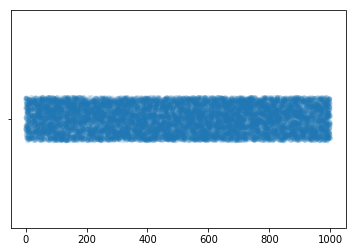

In [43]:
sns.stripplot(x=values, jitter=True, alpha=0.2)

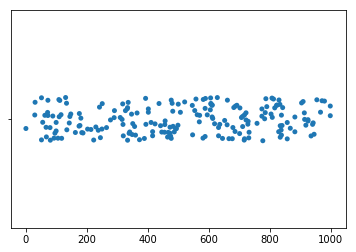

In [45]:
sparse_values = [random.randrange(1,1001) for _ in range (200)]
sns.stripplot(x=sparse_values, jitter=True)

In [26]:
print("Max value: {}\nMin value: {}".format(
    max(values), min(values)))

Max value: 1000
Min value: 1


In [30]:
sorted_vals = sorted(values)
sorted_vals[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]

### The Mean
The mean is a fancy statistical way to say "average." You're all familiar with what average means. But mathemeticians like to be special and specific. There's not just one type of mean. In fact, we'll talk about 3 kinds of "means" that are all useful for different types of numbers.
1. **Arithmetic mean** for common numbers
2. **Geometric mean** for returns or growth
3. **Harmonic mean** for ratios and rates

Buckle up...

#### 1. Arithmetic mean
This is your typical average. You've used it all your life. It's simply the sum of the elements divided by the length. Intuitively, think of it as if you made every element the exact same value so that the sum of all values remains the same as before. What would that value be?

Mathematically it looks like: 

$$\bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n}$$

where $\bar{x}$ is our mean, $x_i$ is a value at the $i$th index of our list, and $n$ is the length of that list.

In Python, it's a simple operation combining two builtins we saw above: `sum()` and `len()`

In [49]:
def arithmetic_mean(vals):
    return sum(vals) / len(vals)

arithmetic_mean(values)

502.1696

From this we see our average value is 502.1696. Let's double check that with our intuitive definition using the sum:

In [82]:
avg_sum = len(values) * arithmetic_mean(values) #10,000 * 502.1696
print("{} =? {}".format(sum(values), avg_sum))

5021696 =? 5021696.0


#### 2. Geometric mean
The geometric mean is a similar idea but instead uses the product. It says if I multiply each value in our list together, what one value could I use instead to get the same result? 

The geometric mean is very useful in things like growth or returns (e.g. stocks) because adding returns doesn't give us the ability to get returns over a longer length of time. In other words, if I have a stock growing at 5% per year, what will be the total returns after 5 years?

If you said 25%, you are wrong. It would be $1.05^5 - 1  \approx 27.63\%$

Mathematically, our geometric is:
$$ GM(x) = \sqrt[n]{x_1 \times x_2 \times \cdots \times x_n }$$

In [74]:
returns = [1.05, 1.06, .98, 1.08]

def product(vals):
    ''' 
    This is a function that will multiply every item in the list
    together reducing it to a single number. The Pythonic way to
    do this would be to use the 'reduce' function like so:
    > reduce(lambda x, y: x * y, vals)
    We are explicit here for clairty.
    '''
    prod = 1
    for x in vals:
        prod = prod * x
    return prod

def geometric_mean(vals):
    geo_mean = product(vals) ** (1/len(vals)) # raising to 1/n is the same as nth root
    return geo_mean

geom = geometric_mean(returns)
geom

1.041804547674296

Using our `product` function above, we can easily multiply all the values together to get what your return after 4 years is:

In [75]:
product(returns)

1.1779992000000004

or roughly $17.8\%$. Using our geometric mean should give us the same result:

In [68]:
geom**4

1.1779992

Now look at what happens with the arithmetic mean:

In [69]:
arm = arithmetic_mean(returns)
arm

1.0425

In [70]:
arm**4

1.1811478250390623

The arithmetic mean would tell us that after 4 years, we should have an $18.1\%$ return. But we know it should actually be a $17.8\%$ return. It can be tricky to know when to use the arithmetic and geometric means. You also must remember to add the $1$ to your returns or it will not mathematically play nice.

#### 3. Harmonic mean
This one is also a bit tricky to get intuitively. Here we want an average of _rates_. Not to be confused with an average of _returns_. Recall a rate is simply a ratio between two quantities, like the price-to-earnings ratio of a stock or miles-per-hour of a car.

Let's take a look at the mph example. If I have a car who goes 60mph for 50 miles, 50mph for another 50, and 40mph for yet another 50, then the car has traveled 150 miles in $\frac{50mi}{60\frac{mi}{h}} + \frac{50mi}{50\frac{mi}{h}} + \frac{50mi}{40\frac{mi}{h}} = 3.08\bar{3}h$. This corresponds to a geometric mean of $150mi \div 3.08\bar{3}h \approx 48.648mph$. Much different from our arithmetic mean of 50mph. 

(_Note: if in our example the car did not travel a clean 50 miles for every segment, we have to use a_ [weighted harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean#Weighted_harmonic_mean).)

Mathematically, the harmonic mean looks like this:

$$ \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\cdots+\frac{1}{x_n}} $$

So let's code that up:

In [81]:
speeds = [60, 50, 40]

def harmonic_mean(vals):
    sum_recip = sum(1/x for x in vals)
    return len(vals) / sum_recip

harmonic_mean(speeds)

48.648648648648646

Now you know about the three [Pythagorean means](https://en.wikipedia.org/wiki/Pythagorean_means). Thank me after you brag at your next party. Let's now move on to something very important in descriptive statistics:

### The Median

In [37]:
def median(vals):
    n = len(vals)
    sorted_vals = sorted(vals)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_vals[midpoint]
    else:
        return mean([sorted_vals[midpoint], sorted_vals[midpoint+1]])
    
median(values)

506.0

In [38]:
# Recall our values list is even, meaning 506.0 was both item 5000 and 5001
len(values)

10000

In [39]:
# So lets look at how it handles odd values
# It just picks the middle one
median([1,2,3])

2

In [ ]:
# function to plot a histogram of values
def plot_histogram(vals, bins):
    #plot

Mean is defined as $\Sigma$